In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np

In [3]:
image_directory = '/content/drive/MyDrive/Neuroscience/CNN/Dataset/'
SIZE = 150
dataset = []
label = []


In [4]:
abnormal_images = os.listdir(image_directory + 'abnormal/')
for i, image_name in enumerate(abnormal_images):

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'abnormal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [5]:
normal_images = os.listdir(image_directory + 'normal/')
for i, image_name in enumerate(normal_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'normal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [6]:
dataset = np.array(dataset)
label = np.array(label)

In [7]:
len(dataset)

3000

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [9]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [10]:
INPUT_SHAPE = (SIZE, SIZE, 3)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [14]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 20,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/20
38/38 [==============================] - 97s 3s/step - loss: 0.7294 - accuracy: 0.5421 - val_loss: 0.7006 - val_accuracy: 0.4283
Epoch 2/20
38/38 [==============================] - 94s 2s/step - loss: 0.6515 - accuracy: 0.6246 - val_loss: 0.7903 - val_accuracy: 0.4283
Epoch 3/20
38/38 [==============================] - 90s 2s/step - loss: 0.5614 - accuracy: 0.7175 - val_loss: 0.5253 - val_accuracy: 0.7400
Epoch 4/20
38/38 [==============================] - 101s 3s/step - loss: 0.5090 - accuracy: 0.7679 - val_loss: 0.7925 - val_accuracy: 0.5400
Epoch 5/20
38/38 [==============================] - 94s 2s/step - loss: 0.4706 - accuracy: 0.7837 - val_loss: 0.3956 - val_accuracy: 0.8400
Epoch 6/20
38/38 [==============================] - 90s 2s/step - loss: 0.4101 - accuracy: 0.8229 - val_loss: 0.3883 - val_accuracy: 0.8350
Epoch 7/20
38/38 [==============================] - 90s 2s/step - loss: 0.3510 - accuracy: 0.8525 - val_loss: 0.6729 - val_accuracy: 0.6700
Epoch 8/20
38/38 [=

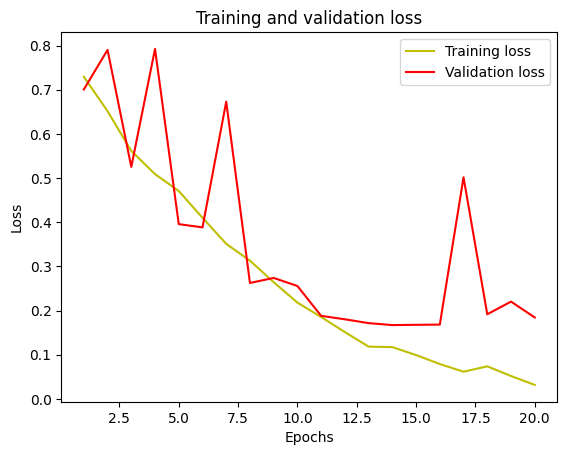

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

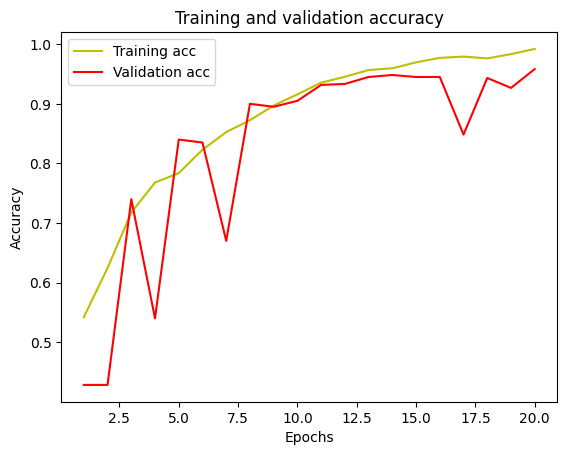

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
len(X_test)

600

In [51]:
def normalize_image(image):
    min_val = image.min()
    max_val = image.max()
    return (image - min_val) / (max_val - min_val)

1/1 [==============================] - 0s 34ms/step
The prediction for this image is:  [[0.00068246]]
The image is anomaly


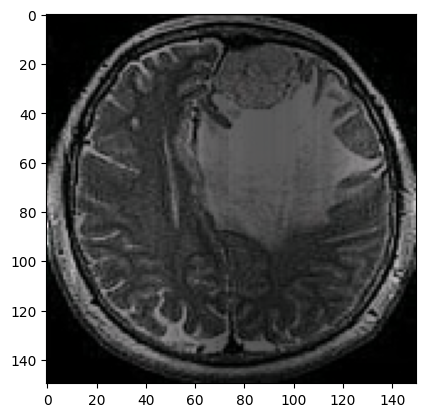

In [52]:
n=35
img = X_test[n]
img_normalized = normalize_image(img)
plt.imshow(img_normalized)
input_img = np.expand_dims(img, axis=0)
print("The prediction for this image is: ", model.predict(input_img))
if (y_test[n]== 0):
  print("The image is anomaly")
else:
  print("The image is normal")

1/1 [==============================] - 0s 34ms/step
The prediction for this image is:  [[0.99998116]]
The image is normal


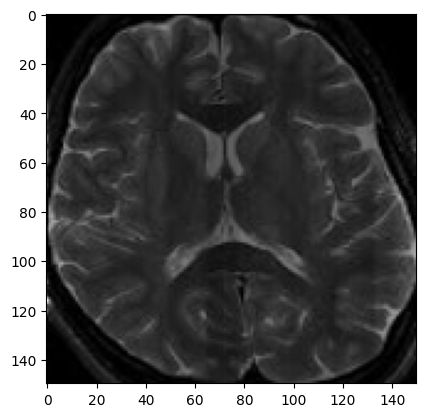

In [50]:
n=151
img = X_test[n]
img_normalized = normalize_image(img)
plt.imshow(img_normalized)
input_img = np.expand_dims(img, axis=0)
print("The prediction for this image is: ", model.predict(input_img))
if (y_test[n]== 0):
  print("The image is anomaly")
else:
  print("The image is normal")

1/1 [==============================] - 0s 46ms/step


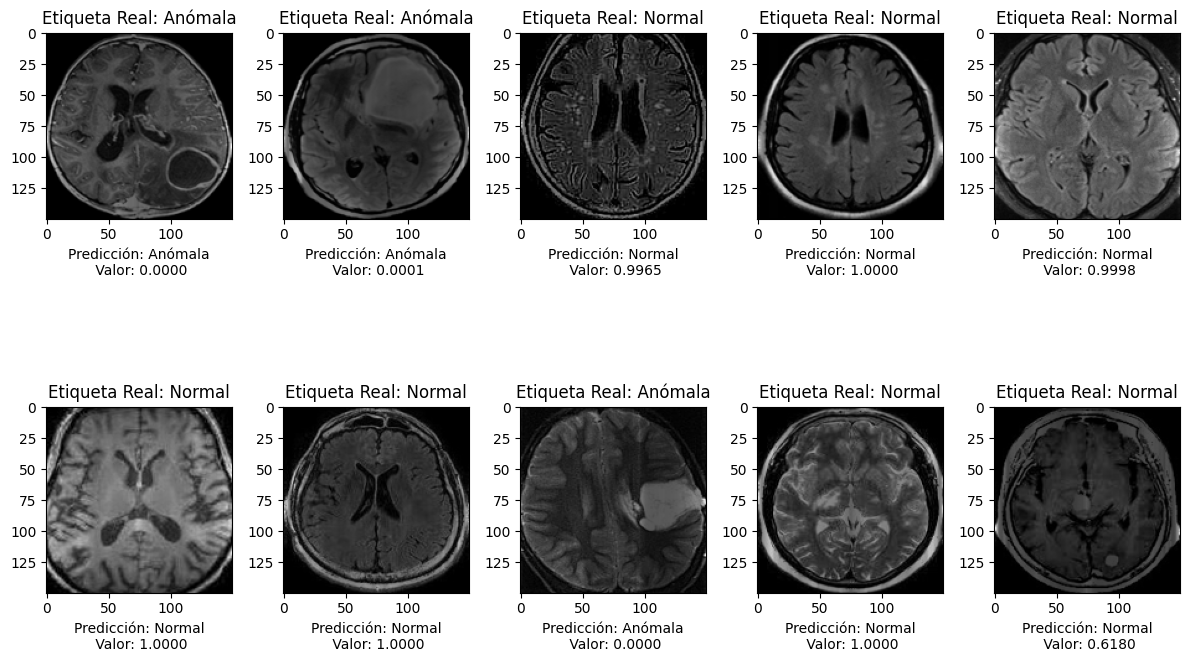

In [55]:
plt.figure(figsize=(12, 8))

for i in range(10):
    img = X_test[i]
    input_img = np.expand_dims(img, axis=0)
    predicción = model.predict(input_img)
    etiqueta_real = y_test[i]

    etiqueta_real_str = "Normal" if etiqueta_real == 1 else "Anómala"

    predicción_str = "Normal" if predicción > 0.5 else "Anómala"

    img_normalized = normalize_image(img)

    plt.subplot(2, 5, i + 1)
    plt.title(f'Etiqueta Real: {etiqueta_real_str}')

    plt.imshow(img_normalized)

    plt.xlabel(f'Predicción: {predicción_str}\n Valor: {predicción[0][0]:.4f}')

plt.tight_layout()
plt.show()